In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit, KFold, StratifiedShuffleSplit
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn import svm

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.metrics import make_scorer

In [2]:
path_train = 'train_house_A.csv' # содержит только имя файла, без имен папок !!!

df = pd.read_csv(path_train)
df

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,5320000,0.405623,0.0,-0.061169,-0.741051,-0.223185,1.361397,1.221991,-0.570187,-0.478408,...,0.245475,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,0.271470,1.391006,-0.141322
1,3465000,0.405623,0.0,-0.826890,-0.867066,-0.223185,-0.734539,-0.964205,-0.570187,-0.478408,...,-1.444928,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.010746,0.617421,-0.141322
2,3500000,0.405623,0.0,-0.963310,-1.676106,-0.223185,-0.734539,-0.692084,-0.570187,-0.478408,...,1.578828,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.237596,1.483005,-0.141322
3,3570000,0.405623,0.0,0.242611,0.193424,-0.223185,-0.734539,-0.696696,-0.570187,1.307431,...,-1.675466,-0.263991,-1.308863,1.222962,-0.219265,-0.554035,0.417348,-0.987324,1.134657,-0.141322
4,4130000,0.405623,0.0,-0.740827,-0.684767,-0.223185,-0.734539,-0.239163,-0.570187,-0.478408,...,-1.347578,-0.263991,1.403419,-0.091662,-0.219265,-0.554035,-0.108582,0.838006,0.360062,-0.141322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,4550000,0.405623,0.0,1.008081,1.658059,-0.223185,-0.734539,-0.696696,-0.570187,-0.478408,...,-1.341446,-0.263991,0.047278,-1.406286,-0.219265,-0.554035,-0.126718,-1.532214,1.329553,-0.141322
404,5250000,0.405623,0.0,1.592671,-0.816078,-0.223185,1.361397,-0.622901,-0.570187,-0.478408,...,-0.144745,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,-1.320247,0.041976,-0.141322
405,5950000,0.405623,0.0,0.582200,0.458904,-0.223185,1.361397,0.640850,-0.570187,-0.478408,...,-0.734544,-0.263991,0.047278,-1.406286,-0.219265,1.804941,-0.126718,-0.017405,-1.353372,-0.141322
406,4319000,0.405623,0.0,-0.973555,0.522287,-0.223185,1.361397,-0.515897,-0.570187,1.307431,...,-0.282323,-0.263991,-1.308863,-1.406286,-0.219265,-0.554035,0.195188,-0.131175,1.363075,-0.141322


In [3]:
df.shape

(408, 30)

In [4]:
df.describe()

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
count,4.080000e+02,408.000000,408.0,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,...,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,4.643597e+06,-0.030652,0.0,-0.021898,-0.004470,-0.044734,-0.015345,-0.037179,0.005930,-0.005686,...,-0.046552,-0.022184,-0.042466,0.017890,-0.043530,-0.039454,-0.038181,-0.048110,-0.025252,-0.044926
std,1.711368e+06,1.031893,0.0,1.019428,0.974612,0.969756,0.996282,1.001595,0.976837,1.007006,...,0.991383,1.020601,0.995270,1.016147,0.900616,0.975409,1.031259,1.008422,1.001805,0.913917
min,1.750000e+06,-2.465344,0.0,-1.224688,-1.780233,-2.633407,-0.734539,-1.614530,-0.570187,-4.050087,...,-1.705711,-2.319351,-2.665004,-1.406286,-0.219265,-0.554035,-5.000645,-1.789595,-1.705457,-3.418780
25%,3.430000e+06,0.405623,0.0,-0.673496,-0.837351,-0.223185,-0.734539,-0.745125,-0.570187,-0.478408,...,-0.881357,-0.263991,-1.308863,-1.406286,-0.219265,-0.554035,-0.126718,-0.896013,-0.887341,-0.141322
50%,4.270000e+06,0.405623,0.0,-0.252391,0.032263,-0.223185,-0.734539,-0.300045,-0.570187,-0.478408,...,-0.072463,-0.263991,0.047278,-0.091662,-0.219265,-0.554035,-0.126718,-0.047954,-0.050893,-0.141322
75%,5.600000e+06,0.405623,0.0,0.312075,0.775898,-0.223185,1.361397,0.454055,1.421812,1.307431,...,0.755884,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.006287,0.787204,0.798591,-0.141322
max,1.141000e+07,0.405623,0.0,8.604753,1.732550,13.826353,1.361397,5.096263,3.413810,3.093270,...,1.745647,7.957450,4.115701,1.222962,4.560702,1.804941,13.021551,1.732996,1.771548,3.136137


In [5]:
df = df.drop_duplicates()
df.shape

(408, 30)

In [6]:
a = df.corr()
b=df.corr().drop('price', axis=1)
b[b>0.3].drop('12', axis=1).sum()

0     1.300066
1     0.000000
2     1.000000
3     1.000000
4     3.334758
5     1.355768
6     2.334210
7     2.975047
8     1.000000
9     1.355768
10    2.300604
11    1.000000
13    1.673262
14    1.000000
15    1.000000
16    1.441229
17    1.000000
18    1.000000
19    1.000000
20    2.902417
21    2.743142
22    1.000000
23    1.000000
24    1.000000
25    2.367804
26    1.000000
27    1.000000
28    2.141166
dtype: float64

In [7]:
features = a[df.corr()>0.3]['price'].dropna().index

In [8]:
features

Index(['price', '0', '4', '6', '7', '12', '13', '16', '21'], dtype='object')

In [9]:
data=df[features]
data

,price,0,4,6,7,12,13,16,21
0,5320000,0.405623,-0.223185,1.221991,-0.570187,-0.929397,1.517692,1.472618,0.047278
1,3465000,0.405623,-0.223185,-0.964205,-0.570187,-0.929397,-0.805741,-0.679063,0.047278
2,3500000,0.405623,-0.223185,-0.692084,-0.570187,0.224410,-0.805741,-0.679063,0.047278
3,3570000,0.405623,-0.223185,-0.696696,-0.570187,-0.929397,-0.805741,-0.679063,-1.308863
4,4130000,0.405623,-0.223185,-0.239163,-0.570187,0.224410,-0.805741,1.472618,1.403419
...,...,...,...,...,...,...,...,...,...
403,4550000,0.405623,-0.223185,-0.696696,-0.570187,0.224410,-0.805741,1.472618,0.047278
404,5250000,0.405623,-0.223185,-0.622901,-0.570187,0.224410,0.355976,-0.679063,0.047278
405,5950000,0.405623,-0.223185,0.640850,-0.570187,-0.929397,1.517692,-0.679063,0.047278
406,4319000,0.405623,-0.223185,-0.515897,-0.570187,-0.929397,-0.805741,-0.679063,-1.308863


In [10]:
y = (data.price)
X = data.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
data.columns

Index(['price', '0', '4', '6', '7', '12', '13', '16', '21'], dtype='object')

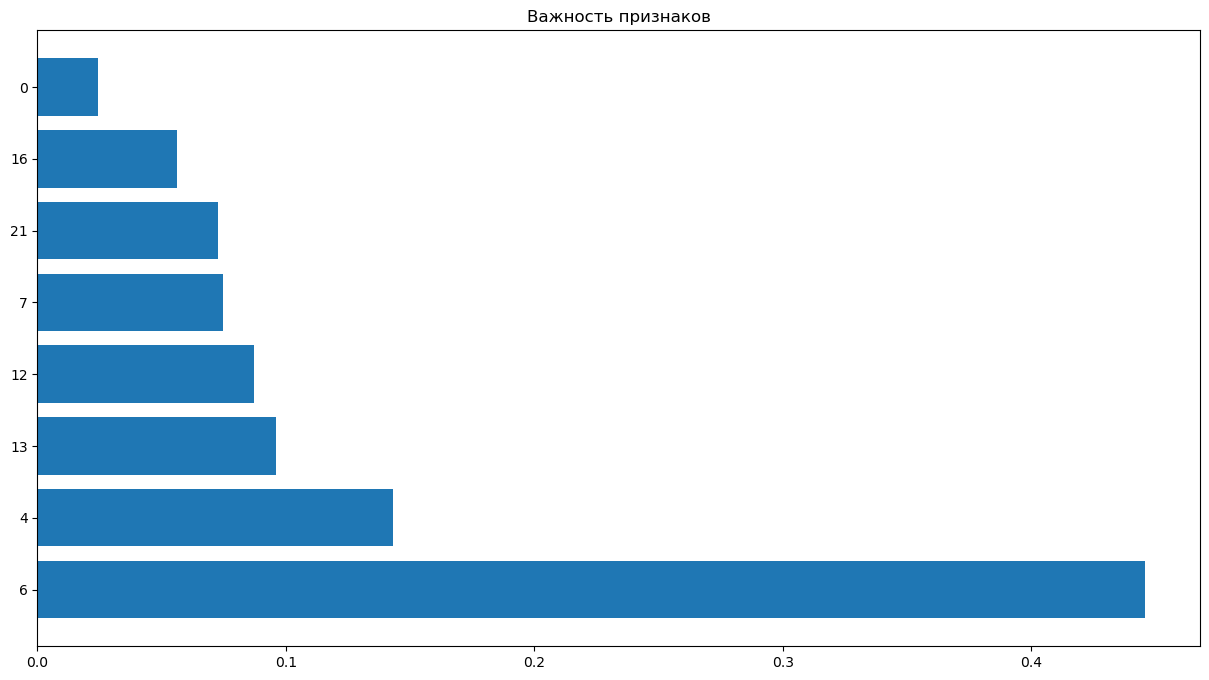

In [12]:
rfc = RandomForestRegressor(n_estimators=100, random_state=42)

# Обучаем модель на обучающих данных
rfc.fit(X_train, y_train)

# Получаем важность признаков
importance = np.sort(rfc.feature_importances_)
importance_name = np.argsort(rfc.feature_importances_)

# Строим график важности признаков
plt.figure(figsize=(15, 8))
plt.barh(width=importance, y=X_train.columns[importance_name])
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

In [13]:
num = data.drop('price', axis=1).columns

poly_transformer = Pipeline(steps=[
    ('polynom', PolynomialFeatures(3,include_bias=False))])

CT = ColumnTransformer([
    ('num_transform', StandardScaler(with_mean=False), num),
    ('poly_transform', poly_transformer, num)
])

display(CT)
ct = CT.fit_transform(X_train)
pd.DataFrame(ct).head()

ColumnTransformer(transformers=[('num_transform',
                                 StandardScaler(with_mean=False),
                                 Index(['0', '4', '6', '7', '12', '13', '16', '21'], dtype='object')),
                                ('poly_transform',
                                 Pipeline(steps=[('polynom',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False))]),
                                 Index(['0', '4', '6', '7', '12', '13', '16', '21'], dtype='object'))])

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
0,-2.341565,-0.208749,-0.321948,-0.567374,-0.930740,-0.810192,-0.680155,-1.260630,-2.465344,-0.223185,...,-0.523102,-0.440860,-0.849738,-0.371548,-0.716143,-1.380333,-0.313133,-0.603551,-1.163317,-2.242241
1,0.385257,-0.208749,0.420390,-0.567374,-0.930740,0.357942,1.474988,0.045536,0.405623,-0.223185,...,0.045109,0.186608,0.005991,0.771970,0.024784,0.000796,3.193527,0.102528,0.003292,0.000106
2,0.385257,-0.208749,-0.371437,-0.567374,0.224734,1.526077,1.474988,1.351703,0.405623,-0.223185,...,3.495838,3.392015,3.232623,3.291275,3.136617,2.989226,3.193527,3.043462,2.900448,2.764155
3,-2.341565,-0.208749,-0.826737,-0.567374,-0.930740,-0.810192,1.474988,0.045536,-2.465344,-0.223185,...,-0.523102,0.956052,0.030694,-1.747334,-0.056098,-0.001801,3.193527,0.102528,0.003292,0.000106
4,0.385257,-0.208749,-0.549598,-0.567374,0.224734,0.357942,-0.680155,0.045536,0.405623,-0.223185,...,0.045109,-0.086050,0.005991,0.164150,-0.011429,0.000796,-0.313133,0.021801,-0.001518,0.000106


In [14]:
pipe_ridge = Pipeline(steps = [
    ('preproc', CT),
    ('model', Ridge()) 
])

model_ridge = pipe_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

In [15]:
pipe_kneighbors = Pipeline(steps = [
    ('preproc', CT),
    ('model', KNeighborsRegressor(n_neighbors=10)) 
])

model_kneighbors = pipe_kneighbors.fit(X_train, y_train)
y_pred_kneighbors = model_kneighbors.predict(X_test)

In [16]:
pipe_linear = Pipeline(steps = [
    ('preproc', CT),
    ('model', LinearRegression())
])

model_linear = pipe_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

In [17]:
models = [
    ('Ridge', model_ridge, y_pred_ridge),
    ('LinearRegression', model_linear, y_pred_linear),
    ('KNeighborsRegressor', model_kneighbors, y_pred_kneighbors),
]

for model_name, model, y_pred in models:
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f'Score MAPE for {model_name}: {mape:.4f}')

Score MAPE for Ridge: 0.3153
Score MAPE for LinearRegression: 1201093640.9942
Score MAPE for KNeighborsRegressor: 0.2238


In [18]:
model_pipe = Pipeline([
                ('model', TransformedTargetRegressor(
                        regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', KNeighborsRegressor())
                            ]),
                        transformer=PowerTransformer(),
                        check_inverse = False)
                )])
model_pipe    

Pipeline(steps=[('model',
                 TransformedTargetRegressor(check_inverse=False,
                                            regressor=Pipeline(steps=[('preproc',
                                                                       ColumnTransformer(transformers=[('num_transform',
                                                                                                        StandardScaler(with_mean=False),
                                                                                                        Index(['0', '4', '6', '7', '12', '13', '16', '21'], dtype='object')),
                                                                                                       ('poly_transform',
                                                                                                        Pipeline(steps=[('polynom',
                                                                                                                         PolynomialFeatures(degree=3,
                                                                                                                                            include_bias=False))]),
                                                                                                        Index(['0', '4', '6', '7', '12', '13', '16', '21'], dtype='object'))])),
                                                                      ('estimator',
                                                                       KNeighborsRegressor())]),
                                            transformer=PowerTransformer()))])

In [19]:
param_grid = [
    {'model__regressor__estimator':[KNeighborsRegressor()],
     'model__regressor__estimator__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
     'model__regressor__estimator__p': [1, 2, 3],
     'model__transformer':[PowerTransformer()]},
]
    
scores='neg_mean_absolute_percentage_error'
grid_2 = GridSearchCV(model_pipe, n_jobs=1, param_grid=param_grid, return_train_score=True, scoring=scores)
grid_2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('model',
                                        TransformedTargetRegressor(check_inverse=False,
                                                                   regressor=Pipeline(steps=[('preproc',
                                                                                              ColumnTransformer(transformers=[('num_transform',
                                                                                                                               StandardScaler(with_mean=False),
                                                                                                                               Index(['0', '4', '6', '7', '12', '13', '16', '21'], dtype='object')),
                                                                                                                              ('poly_transform',
                                                                                                                               Pipeline(steps=[('polynom',
                                                                                                                                                PolynomialFeatures(degree=3,
                                                                                                                                                                   inc...
                                                                                              KNeighborsRegressor())]),
                                                                   transformer=PowerTransformer()))]),
             n_jobs=1,
             param_grid=[{'model__regressor__estimator': [KNeighborsRegressor()],
                          'model__regressor__estimator__n_neighbors': [1, 2, 3,
                                                                       4, 5, 6,
                                                                       7, 8,
                                                                       9],
                          'model__regressor__estimator__p': [1, 2, 3],
                          'model__transformer': [PowerTransformer()]}],
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error')

In [20]:
grid_result = pd.DataFrame(grid_2.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,24,19,21,22,12,18,15,25,23,26,...,14,11,7,8,5,4,3,2,0,1
mean_fit_time,0.01114,0.013224,0.013112,0.011832,0.015463,0.016521,0.014275,0.013084,0.012778,0.014086,...,0.012766,0.011046,0.019891,0.016836,0.014288,0.012096,0.008344,0.013121,0.016614,0.011597
std_fit_time,0.004471,0.004798,0.004889,0.004102,0.002925,0.003346,0.001255,0.004744,0.005478,0.004859,...,0.004103,0.005312,0.003143,0.004061,0.002676,0.002504,0.003628,0.00401,0.010619,0.001171
mean_score_time,0.078686,0.067673,0.070438,0.071003,0.079435,0.079425,0.081452,0.070169,0.141794,0.147758,...,0.158094,0.151141,0.088136,0.163731,0.153468,0.07303,0.070327,0.148956,0.08197,0.072747
std_score_time,0.01688,0.001222,0.006953,0.005756,0.01644,0.005447,0.000864,0.003863,0.008567,0.002502,...,0.007096,0.011939,0.005159,0.01089,0.011873,0.001852,0.003051,0.016921,0.017483,0.004991
param_model__regressor__estimator,KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),...,KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor(),KNeighborsRegressor()
param_model__regressor__estimator__n_neighbors,9,7,8,8,5,7,6,9,8,9,...,5,4,3,3,2,2,2,1,1,1
param_model__regressor__estimator__p,1,2,1,2,1,1,1,2,3,3,...,3,3,2,3,3,2,1,3,1,2
param_model__transformer,PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),...,PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer(),PowerTransformer()
params,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...,{'model__regressor__estimator': KNeighborsRegr...
split0_test_score,-0.183429,-0.177647,-0.179133,-0.183051,-0.17826,-0.175892,-0.182204,-0.188825,-0.187388,-0.188377,...,-0.182784,-0.182929,-0.206523,-0.19369,-0.216432,-0.217768,-0.224678,-0.254943,-0.265319,-0.265547


In [21]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [22]:
grad_boost = GradientBoostingRegressor(random_state=42)

# Задаем параметры для сетки
param_gb = {
    'n_estimators': [50, 500, 600],
    'learning_rate': [0.01, 0.1, 0.5],
    'subsample': [0.5, 0.75, 1.0] 
}

scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Используем GridSearchCV с метрикой MAPE
grid_search_gb = GridSearchCV(grad_boost, param_gb, cv=5, scoring=scorer)

# Обучаем модель
grid_search_gb.fit(X_train, y_train)

# Выводим результаты
print("Наилучшие параметры:\n", grid_search_gb.best_params_)
print("Наилучший MAPE на обучающем наборе: {:.3f}".format(-grid_search_gb.best_score_))
print("MAPE на тестовом наборе: {:.3f}".format(mean_absolute_percentage_error(y_test, grid_search_gb.predict(X_test))))

Наилучшие параметры:
 {'learning_rate': 0.01, 'n_estimators': 500, 'subsample': 0.75}
Наилучший MAPE на обучающем наборе: 20.610
MAPE на тестовом наборе: 21.497


In [23]:
gbrt = GradientBoostingRegressor(learning_rate=0.01, subsample=0.5, min_samples_split=5, n_estimators=500, random_state=42)
gbrt.fit(X_train, y_train)

# Make predictions
y_train_pred = gbrt.predict(X_train)
y_test_pred = gbrt.predict(X_test)

# Evaluate the model using Mean Absolute Percentage Error (MAPE)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

print('MAPE on the training set: {:.3f}'.format(mape_train))
print('MAPE on the test set: {:.3f}'.format(mape_test))

MAPE on the training set: 15.290
MAPE on the test set: 21.292
